# Preprocessing the data :)

In [4]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_samples = []
train_labels  = []

In [6]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [7]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
scaled_train_samples

array([[0.63218391],
       [0.3908046 ],
       [0.71264368],
       ...,
       [0.34482759],
       [0.63218391],
       [0.04597701]])

# Simple tf.keras Sequencial Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
Num GPUs Available:  0


In [12]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.7098 - accuracy: 0.4439 - val_loss: 0.6828 - val_accuracy: 0.6238 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6666 - accuracy: 0.6196 - val_loss: 0.6340 - val_accuracy: 0.7381 - 137ms/epoch - 725us/step
Epoch 3/30
189/189 - 0s - loss: 0.6321 - accuracy: 0.6783 - val_loss: 0.5935 - val_accuracy: 0.7714 - 137ms/epoch - 725us/step
Epoch 4/30
189/189 - 0s - loss: 0.5991 - accuracy: 0.7360 - val_loss: 0.5539 - val_accuracy: 0.7905 - 138ms/epoch - 728us/step
Epoch 5/30
189/189 - 0s - loss: 0.5662 - accuracy: 0.7688 - val_loss: 0.5166 - val_accuracy: 0.8286 - 136ms/epoch - 720us/step
Epoch 6/30
189/189 - 0s - loss: 0.5340 - accuracy: 0.7979 - val_loss: 0.4816 - val_accuracy: 0.8476 - 136ms/epoch - 722us/step
Epoch 7/30
189/189 - 0s - loss: 0.5028 - accuracy: 0.8164 - val_loss: 0.4483 - val_accuracy: 0.8810 - 141ms/epoch - 745us/step
Epoch 8/30
189/189 - 0s - loss: 0.4718 - accuracy: 0.8381 - val_loss: 0.4149 - val_accuracy: 0.9143 - 140ms/epoch - 

In [16]:
test_samples = []
test_labels  = []
for i in range(50):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
test_samples = np.array(train_samples)
test_labels = np.array(train_labels)

test_labels, test_samples = shuffle(test_labels, test_samples)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))
scaled_test_samples

array([[0.50574713],
       [0.05747126],
       [0.11494253],
       ...,
       [0.73563218],
       [0.64367816],
       [0.65517241]])

In [17]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [18]:
for i in predictions:
    print(i)
    
# Not side effect  -    Side effect

[0.69957346 0.30042654]
[0.9669543  0.03304568]
[0.96711606 0.03288396]
[0.96584815 0.03415185]
[0.90234333 0.09765662]
[0.10115412 0.8988459 ]
[0.924085   0.07591485]
[0.9138333  0.08616666]
[0.8895065  0.11049341]
[0.96661794 0.03338206]
[0.27959266 0.7204073 ]
[0.33831117 0.66168875]
[0.1141434 0.8858565]
[0.1630622  0.83693784]
[0.9635276  0.03647231]
[0.10115412 0.8988459 ]
[0.27959266 0.7204073 ]
[0.27959266 0.7204073 ]
[0.96711606 0.03288396]
[0.03576867 0.9642313 ]
[0.96712136 0.03287871]
[0.0840401 0.9159599]
[0.72772187 0.27227813]
[0.046677 0.953323]
[0.1630622  0.83693784]
[0.9671677  0.03283231]
[0.8593687  0.14063129]
[0.9475683  0.05243172]
[0.11414341 0.88585657]
[0.47015515 0.5298448 ]
[0.06911477 0.9308852 ]
[0.0840401 0.9159599]
[0.04368462 0.95631534]
[0.0568647 0.9431354]
[0.9669041  0.03309574]
[0.0568647 0.9431354]
[0.96584815 0.03415185]
[0.96662074 0.03337923]
[0.8593687  0.14063129]
[0.5045763  0.49542367]
[0.967092   0.03290804]
[0.96712136 0.03287871]
[0.967

In [19]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [20]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
1
1
1
0
1
0
1
0
1
1
0
0
0
1
1
1
1
1
1
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
1
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
1
0
0
1
1
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
1
1
0
0
1
1
0
1
1
0
0
0
1
0
0
1
1
1
0
1
0
1
1
1
0
0
1
1
0
1
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
0
1
0
1
0
0
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
0
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
0
0
1
1
1
1
1
0
0
0
0
0
0
1
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
1
0
0
1
0
0
0
1
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
0
0
1
0
0
1
1
0
1
0
0
0
1
0
1
0
0
0
0
1
1
1
1
0
0
1
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
0
0
1
0
1
1
1
1
0
1
1
1
1
0
0
0
1
0
0
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
0
0
1


# Confusion Matrix

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [22]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [23]:
def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalizes confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 984   66]
 [  50 1000]]


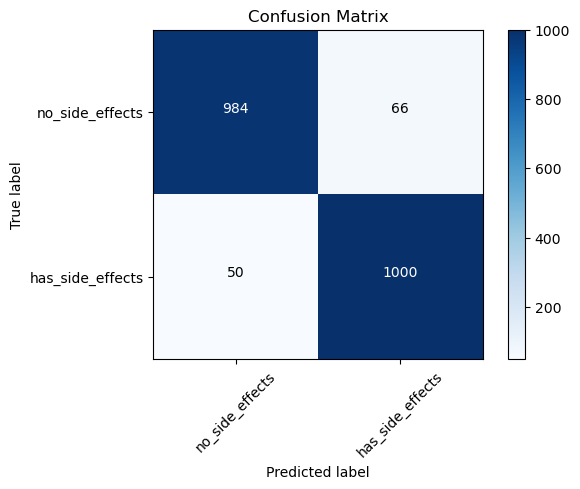

In [24]:
cm_plot_labels = ['no_side_effects', 'has_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [25]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [26]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                32        
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
new_model.get_weights()

[array([[-0.21209818,  0.35775793, -0.30734178,  0.4917096 ,  0.41417477,
          0.62498415, -0.22149399, -0.0294888 , -0.0504083 ,  0.5973495 ,
          0.24950844,  0.46634322,  0.28403476,  0.31297025, -0.2241672 ,
          0.60095745]], dtype=float32),
 array([ 0.        , -0.09179552,  0.        , -0.12762514, -0.11130419,
        -0.12157861,  0.        ,  0.        ,  0.1770711 , -0.15488108,
         0.13858946,  0.24565157, -0.0966536 , -0.10571716,  0.        ,
        -0.11066963], dtype=float32),
 array([[ 1.78229660e-01,  3.44679356e-02, -1.35100037e-01,
          3.34582061e-01, -1.06735289e-01, -1.06810316e-01,
          2.53872663e-01, -3.16159427e-02, -2.18966112e-01,
          2.38611996e-02, -2.72881210e-01, -6.59421086e-03,
          3.12142998e-01,  6.58102036e-02, -2.43808210e-01,
         -2.75649577e-01, -2.50990629e-01,  3.15220386e-01,
         -2.51330495e-01, -2.39216983e-01, -1.02663219e-01,
          2.36679524e-01,  2.25931406e-03, -1.98950827e-01,
 

In [32]:
new_model.optimizer

# model.to_json()

In [33]:
json_string = model.to_json()

In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {

In [36]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [37]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# model.save_weights()


In [39]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [40]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [42]:
model2.load_weights('models/my_model_weights.h5')
model2.get_weights()

[array([[-0.18918592,  0.41284305, -0.07663709,  0.35814676,  0.27448192,
          0.5187495 ,  0.30465683,  0.39318776,  0.0037241 ,  0.6135482 ,
          0.42541528,  0.6919125 , -0.4265694 , -0.03737617, -0.5595693 ,
         -0.12580961]], dtype=float32),
 array([ 0.        , -0.10664466,  0.        , -0.11676954, -0.09286278,
        -0.10645934, -0.1006976 ,  0.11019635,  0.24326327, -0.14169216,
        -0.12694348, -0.05043885,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-0.2422513 ,  0.32990697,  0.18223718,  0.2612107 ,  0.07600349,
         -0.3029474 , -0.0970915 , -0.20585574,  0.07350454,  0.22948715,
         -0.3003483 , -0.18524164,  0.30143407,  0.10884625, -0.13837291,
         -0.25172997, -0.1561882 ,  0.14298916,  0.31911924,  0.25298277,
         -0.00422001,  0.1164048 , -0.2341704 ,  0.13420483,  0.19386968,
         -0.31092092, -0.18845356, -0.1802597 ,  0.1739671 , -0.09535328,
         -0.15181413, -0.11129077],
 